In [48]:
import  requests
def events_getter ():
    url = "https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp/events"

    while True:
        response = requests.get(url)
        data = response.json()
        yield data

        if 'next' not in response.links:
            break
        url = response.links['next']['url']

In [49]:
events_pages = events_getter()

for events_page in events_pages:
    print(events_page)

[{'id': '5774658125', 'type': 'WatchEvent', 'actor': {'id': 72028015, 'login': 'middaycoffee', 'display_login': 'middaycoffee', 'gravatar_id': '', 'url': 'https://api.github.com/users/middaycoffee', 'avatar_url': 'https://avatars.githubusercontent.com/u/72028015?'}, 'repo': {'id': 419661684, 'name': 'DataTalksClub/data-engineering-zoomcamp', 'url': 'https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp'}, 'payload': {'action': 'started'}, 'public': True, 'created_at': '2026-01-13T10:18:42Z', 'org': {'id': 72699292, 'login': 'DataTalksClub', 'gravatar_id': '', 'url': 'https://api.github.com/orgs/DataTalksClub', 'avatar_url': 'https://avatars.githubusercontent.com/u/72699292?'}}, {'id': '5774652996', 'type': 'WatchEvent', 'actor': {'id': 110102423, 'login': 'mavazvar95', 'display_login': 'mavazvar95', 'gravatar_id': '', 'url': 'https://api.github.com/users/mavazvar95', 'avatar_url': 'https://avatars.githubusercontent.com/u/110102423?'}, 'repo': {'id': 419661684, 'name': 'D

In [50]:
event = events_page[0]
event

{'id': '5759281666',
 'type': 'WatchEvent',
 'actor': {'id': 246267751,
  'login': 'nadaabdelhadyy1601',
  'display_login': 'nadaabdelhadyy1601',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/nadaabdelhadyy1601',
  'avatar_url': 'https://avatars.githubusercontent.com/u/246267751?'},
 'repo': {'id': 419661684,
  'name': 'DataTalksClub/data-engineering-zoomcamp',
  'url': 'https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp'},
 'payload': {'action': 'started'},
 'public': True,
 'created_at': '2026-01-12T19:30:30Z',
 'org': {'id': 72699292,
  'login': 'DataTalksClub',
  'gravatar_id': '',
  'url': 'https://api.github.com/orgs/DataTalksClub',
  'avatar_url': 'https://avatars.githubusercontent.com/u/72699292?'}}

In [21]:
def process_events(event):
    result = {}
    result['id'] = event['id']
    result['type'] = event['type']
    result['public'] = event['public']

    result['create_at'] = event['created_at']

    result['actor__id'] = event['actor']['id']
    result['actor__login'] = event['actor']['login']

    topics = event.get('payload', {}).get('pull_request', {}).get('base', {}).get('topics', [])

    return result, topics

In [35]:
processed_events = []
for event in events_page:
    processed_event = process_events(event)
    processed_events.append(processed_event)
processed_events

[({'id': '5758546199',
   'type': 'WatchEvent',
   'public': True,
   'create_at': 1768244056.0,
   'actor__id': 191936668,
   'actor__login': 'inturimark91'},
  []),
 ({'id': '5758496104',
   'type': 'WatchEvent',
   'public': True,
   'create_at': 1768243910.0,
   'actor__id': 93291137,
   'actor__login': 'edgjaan'},
  []),
 ({'id': '5758468346',
   'type': 'WatchEvent',
   'public': True,
   'create_at': 1768243835.0,
   'actor__id': 79021018,
   'actor__login': 'msacavel'},
  []),
 ({'id': '5758401010',
   'type': 'WatchEvent',
   'public': True,
   'create_at': 1768243652.0,
   'actor__id': 254527448,
   'actor__login': 'joma431'},
  []),
 ({'id': '5758332432',
   'type': 'WatchEvent',
   'public': True,
   'create_at': 1768243449.0,
   'actor__id': 215345031,
   'actor__login': 'Arkala20'},
  []),
 ({'id': '5758285105',
   'type': 'WatchEvent',
   'public': True,
   'create_at': 1768243306.0,
   'actor__id': 59772352,
   'actor__login': 'DeepaliSharma99'},
  []),
 ({'id': '575821

In [4]:
all_data = []
pages = events_getter()
for page in pages:
    all_data.extend(page)
len(all_data)

NameError: name 'events_getter' is not defined

Convert timestamps

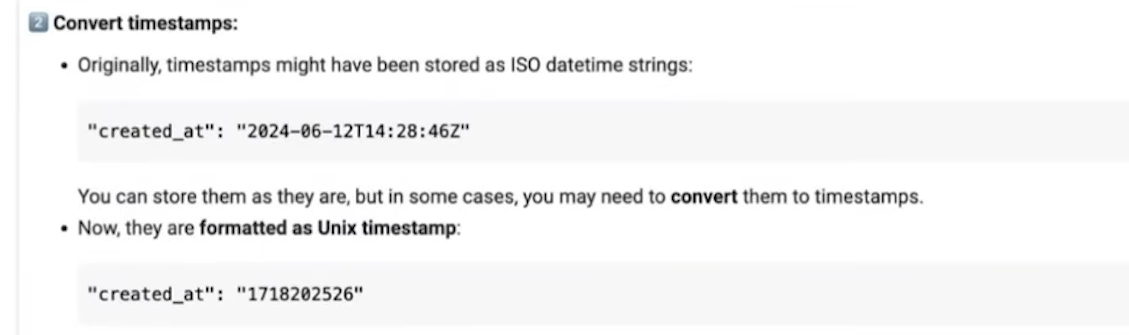

Giải thích: topics = event.get('payload', {}).get('pull_request', {}).get('base', {}).get('topics', [])
1. Phân tích từng bước
Dòng code này truy cập theo thứ tự:
event → payload → pull_request → base → topics
 .event.get('payload', {}): Tìm khóa 'payload'. Nếu không thấy, trả về một từ điển rỗng {}.
 .get('pull_request', {}): (Trên kết quả vừa tìm được) Tìm tiếp khóa 'pull_request'. Nếu không thấy, trả về {}.
 .get('base', {}): Tiếp tục tìm khóa 'base'. Nếu không thấy, trả về {}.
 .get('topics', []): Cuối cùng tìm khóa 'topics'. Nếu không thấy, trả về một danh sách rỗng [].
2. Tại sao phải viết dài như vậy? (Tầm quan trọng của "An toàn")
Nếu bạn viết theo cách thông thường như sau:
topics = event['payload']['pull_request']['base']['topics']
Chương trình sẽ bị lỗi (Crash) ngay lập tức nếu chỉ cần một trong các khóa đó không tồn tại.


In [2]:
from datetime import datetime
def process_events(event):
    result = {}
    result['id'] = event['id']
    result['type'] = event['type']
    result['public'] = event['public']

    parsed_timestamp = datetime.fromisoformat(event['created_at'])
    result['create_at'] = parsed_timestamp.timestamp()

    result['actor__id'] = event['actor']['id']
    result['actor__login'] = event['actor']['login']

    topics = event.get('payload', {}).get('pull_request', {}).get('base', {}).get('topics', [])

    return result, topics


In [3]:
processed_events = []
processed_topics = []
for event in all_data:
    processed_event, topics = process_events(event)
    processed_events.append(processed_event)
    processed_topics.extend(topics)

print(processed_events)
print(processed_topics[:5])

NameError: name 'all_data' is not defined